In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np

ticker_code = "IBM"

df = yf.download(ticker_code, start='2025-01-01', end='2025-06-13', group_by='ticker')
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(1)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Date,,,,,
2025-01-02,218.895348,219.556512,214.730987,217.040131,2579500
2025-01-03,217.642083,220.711079,217.642083,219.714386,3872100
2025-01-06,220.059782,221.391988,217.839448,219.734131,2846700
2025-01-07,220.405168,223.720867,219.892020,221.007126,3299300
2025-01-08,220.957782,221.934719,217.918390,220.237396,2619800


In [ ]:
window = 2
df['SMA'] = df['Close'].rolling(window=window).mean()

#WMA
weights = np.arange(1,window+1)
df['WMA'] = df['Close'].rolling(window=window).apply(lambda x: np.dot(x,weights)/weights.sum() , raw = True)

#EMA
df['EMA'] = df['Close'].ewm(span = window).mean()



df.head()

Price,Open,High,Low,Close,Volume,SMA,WMA,EMA
Date,,,,,,,,
2025-01-02,218.895348,219.556512,214.730987,217.040131,2579500,NaN,NaN,217.040131
2025-01-03,217.642083,220.711079,217.642083,219.714386,3872100,218.377258,218.822968,219.045822
2025-01-06,220.059782,221.391988,217.839448,219.734131,2846700,219.724258,219.727549,219.522344
2025-01-07,220.405168,223.720867,219.892020,221.007126,3299300,220.370628,220.582794,220.524572
2025-01-08,220.957782,221.934719,217.918390,220.237396,2619800,220.622261,220.493973,220.332330


(array([20089., 20120., 20148., 20179., 20209., 20240.]),
 [Text(20089.0, 0, '2025-01'),
  Text(20120.0, 0, '2025-02'),
  Text(20148.0, 0, '2025-03'),
  Text(20179.0, 0, '2025-04'),
  Text(20209.0, 0, '2025-05'),
  Text(20240.0, 0, '2025-06')])

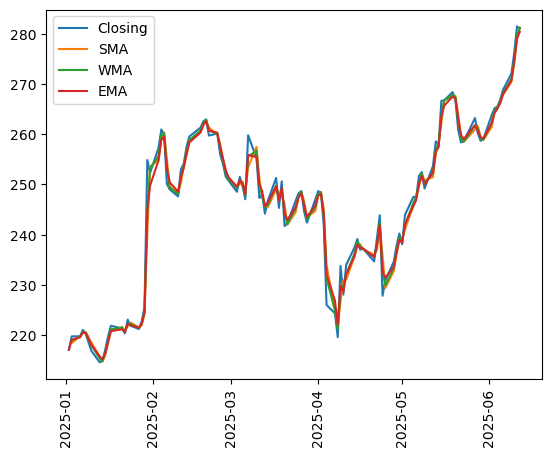

In [9]:
plt.plot(df.index , df['Close'] , label = "Closing")
plt.plot(df.index , df['SMA'] , label = "SMA")
plt.plot(df.index , df['WMA'] , label = "WMA")
plt.plot(df.index , df['EMA'] , label = "EMA")
plt.legend()
plt.xticks(rotation = 90)

In [10]:
df.head()

Price,Open,High,Low,Close,Volume,SMA,WMA,EMA
Date,,,,,,,,
2025-01-02,218.895348,219.556512,214.730987,217.040131,2579500,NaN,NaN,217.040131
2025-01-03,217.642083,220.711079,217.642083,219.714386,3872100,218.377258,218.822968,219.045822
2025-01-06,220.059782,221.391988,217.839448,219.734131,2846700,219.724258,219.727549,219.522344
2025-01-07,220.405168,223.720867,219.892020,221.007126,3299300,220.370628,220.582794,220.524572
2025-01-08,220.957782,221.934719,217.918390,220.237396,2619800,220.622261,220.493973,220.332330


In [12]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing , ExponentialSmoothing

ses_model = SimpleExpSmoothing(df['Close']).fit(smoothing_level = 0.7)
df["SES"] = ses_model.fittedvalues

des_model = ExponentialSmoothing(df['Close'] , trend = "add").fit(smoothing_level = 0.7)
df["DES"] = des_model.fittedvalues

tes_model = ExponentialSmoothing(df['Close'] , trend = "add" , seasonal = "add" , seasonal_periods = 30).fit(smoothing_level = 0.7)
df["TES"] = tes_model.fittedvalues

df.head()

Price,Open,High,Low,Close,Volume,SMA,WMA,EMA,SES,DES,TES
Date,,,,,,,,,,,
2025-01-02,218.895348,219.556512,214.730987,217.040131,2579500,NaN,NaN,217.040131,217.040131,217.616566,217.191288
2025-01-03,217.642083,220.711079,217.642083,219.714386,3872100,218.377258,218.822968,219.045822,217.040131,217.787487,220.190020
2025-01-06,220.059782,221.391988,217.839448,219.734131,2846700,219.724258,219.727549,219.522344,218.912109,219.710742,218.374349
2025-01-07,220.405168,223.720867,219.892020,221.007126,3299300,220.370628,220.582794,220.524572,219.487524,220.301540,215.271450
2025-01-08,220.957782,221.934719,217.918390,220.237396,2619800,220.622261,220.493973,220.332330,220.551245,221.369876,218.403625


(array([20089., 20120., 20148., 20179., 20209., 20240.]),
 [Text(20089.0, 0, '2025-01'),
  Text(20120.0, 0, '2025-02'),
  Text(20148.0, 0, '2025-03'),
  Text(20179.0, 0, '2025-04'),
  Text(20209.0, 0, '2025-05'),
  Text(20240.0, 0, '2025-06')])

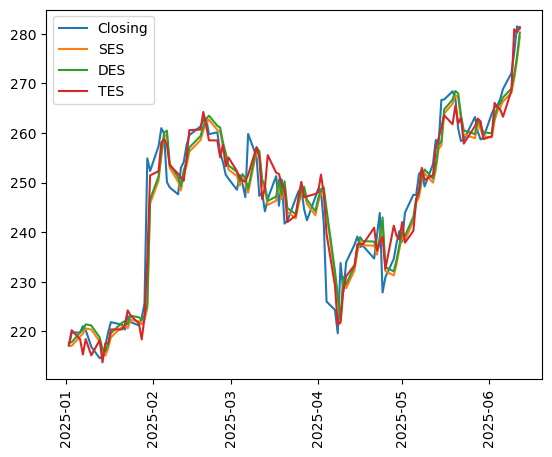

In [13]:
plt.plot(df.index , df['Close'] , label = "Closing")
plt.plot(df.index , df['SES'] , label = "SES")
plt.plot(df.index , df['DES'] , label = "DES")
plt.plot(df.index , df['TES'] , label = "TES")
plt.legend()
plt.xticks(rotation = 90)